In [24]:
# Install necessary libraries
!pip install yfinance plotly

# Importing the required libraries
# Importing the required libraries
import yfinance as yf
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Setting up constants
START = "2015-01-01"
TODAY = "2023-12-31"  # You can change this to the current date

# Stock selection
stocks = ['GOOG', 'AAPL', 'MSFT', 'GME']
selected_stock = 'GOOG'  # You can change this to any stock from the list

# Number of years for prediction
n_years = 1  # You can change this to any number of years

In [4]:
# Caching function to load data
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

# Display loading message
data = load_data(selected_stock)


[*********************100%%**********************]  1 of 1 completed


In [5]:
# Preprocessing
def preprocess_data(data):
    # Feature engineering or selection can be done here
    # For simplicity, let's use 'Close' as the target variable
    df_train = data[['Date','Close']]
    df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

    # Normalization and scaling (for demonstration purposes)
    scaler = StandardScaler()
    df_train[['y']] = scaler.fit_transform(df_train[['y']])

    return df_train

df_train = preprocess_data(data)

In [6]:
# Displaying preprocessed data
print('Preprocessed data:')
print(df_train.tail())

Preprocessed data:
             ds         y
2249 2023-12-08  1.740881
2250 2023-12-11  1.687547
2251 2023-12-12  1.658405
2252 2023-12-13  1.667477
2253 2023-12-14  1.646308


In [7]:
# Splitting the data
X = df_train[['ds']]
y = df_train['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model creation
m = Prophet()

# Training the model
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpobam8mlb/paat2bhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpobam8mlb/79koixui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82068', 'data', 'file=/tmp/tmpobam8mlb/paat2bhu.json', 'init=/tmp/tmpobam8mlb/79koixui.json', 'output', 'file=/tmp/tmpobam8mlb/prophet_modele_qs3ah1/prophet_model-20231215102304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
# Make predictions on the testing set
future = m.make_future_dataframe(periods=len(X_test))
forecast = m.predict(future)
y_pred = forecast['yhat'].tail(len(X_test))

In [11]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nModel Evaluation:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Model Evaluation:
Mean Absolute Error: 1.22
Mean Squared Error: 1.93
R-squared (R2): -0.89


In [52]:
# Hyperparameter Tuning
m = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=20.0,
)

In [53]:
# Feature Engineering (example: add weekly seasonality)
m.add_seasonality(name='weekly', period=7, fourier_order=5)

In [54]:
# Training the model
m.fit(df_train)

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpobam8mlb/xxdx6e9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpobam8mlb/3fhz8qk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37592', 'data', 'file=/tmp/tmpobam8mlb/xxdx6e9t.json', 'init=/tmp/tmpobam8mlb/3fhz8qk9.json', 'output', 'file=/tmp/tmpobam8mlb/prophet_modeliim443ty/prophet_model-20231215110151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [55]:
# Make predictions on the testing set
future = m.make_future_dataframe(periods=len(X_test))
forecast = m.predict(future)
y_pred = forecast['yhat'].tail(len(X_test))

In [56]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

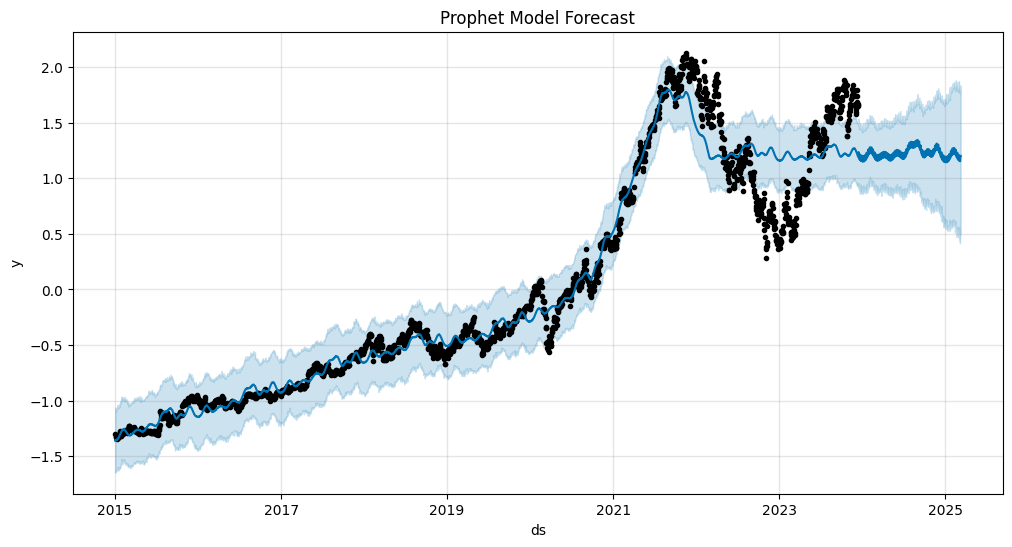

In [57]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
m.plot(forecast, ax=ax)
ax.set_title('Prophet Model Forecast')
plt.show()

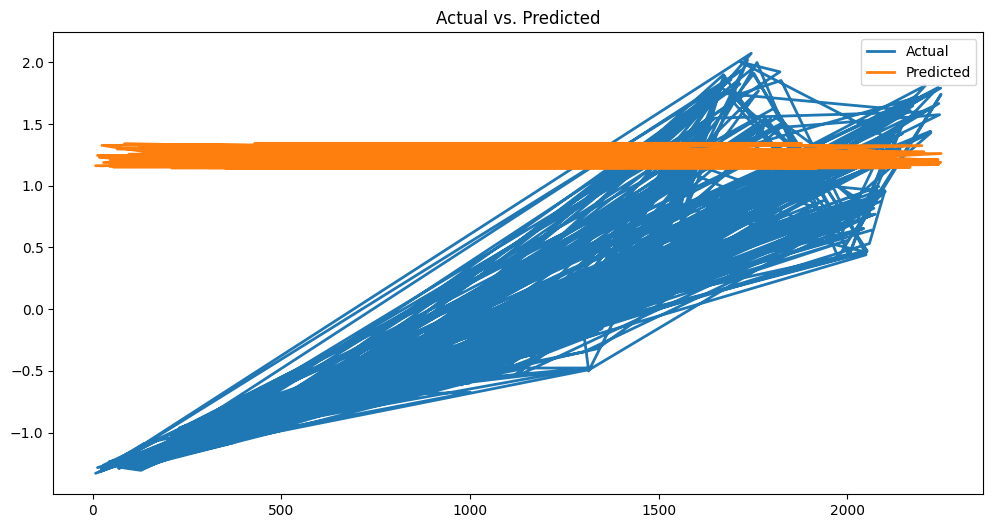

In [58]:
# Actual vs. Predicted plot
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual', linewidth=2)
plt.plot(X_test.index, y_pred, label='Predicted', linewidth=2)
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

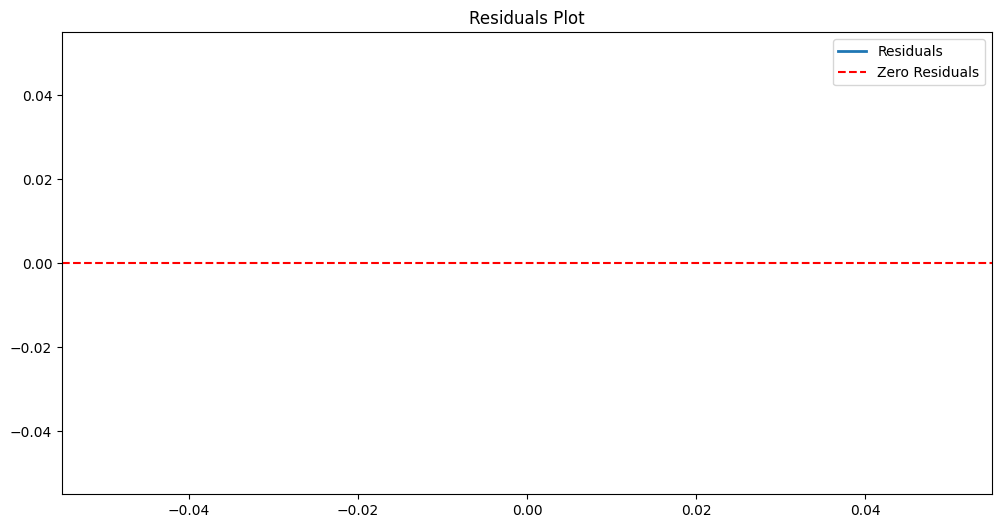

In [60]:
# Residuals plot
plt.figure(figsize=(12, 6))
plt.plot(X_test.index[:len(residuals)//2], residuals[:len(residuals)//2], label='Residuals', linewidth=2)
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

In [61]:
# Model Evaluation
print('\nModel Evaluation:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Model Evaluation:
Mean Absolute Error: 1.36
Mean Squared Error: 2.50
R-squared (R2): -1.60
